# Assignment 1

Hello dear students. You have successfully cloned the repo, great.
 - Exercise 0: Warm up tasks.
 - Exercise 1: Color spaces and morphological operators (Lecture 1)
 - Exercise 2: Convolution and Canny Edge detection (Lecture 2)

## Exercise 0 - Image-I/O

There are several python libraries for reading and displaying images. I recommend scikit-image. Execute the next cell and install missing libraries like scikit-image. 

In [1]:
# imports
%matplotlib inline
from skimage import io, data, color, draw, morphology
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from typing import List, Tuple
# from solutions.assignment_01 import apply_struct_elem

(506, 760, 3)


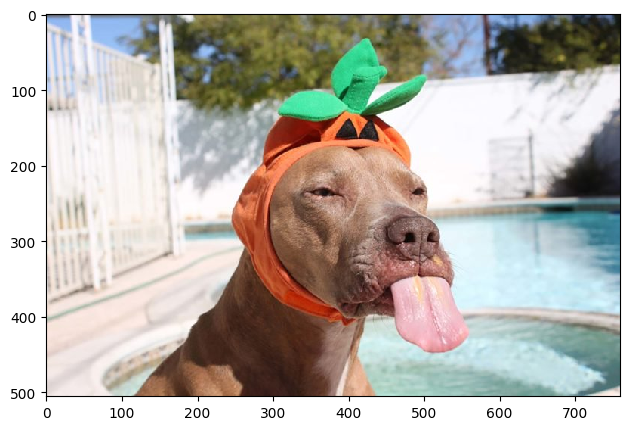

In [2]:
image = io.imread('images/dog.jpg')
print(image.shape)
io.imshow(image)

By the way, there are many test images in skimage.data that you can use for your tasks. Execute the next two cells. 

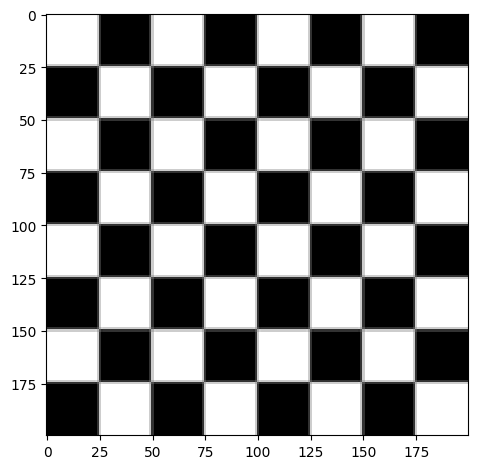

In [3]:
io.imshow(data.checkerboard())

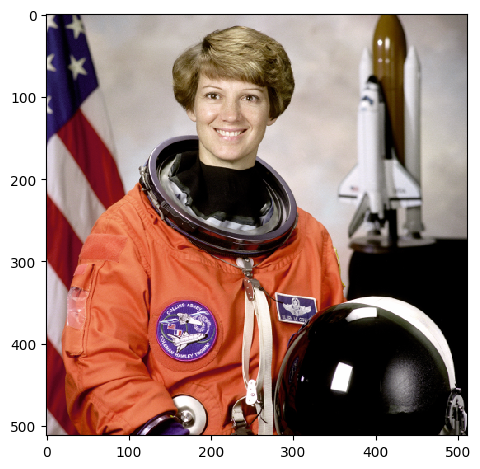

In [4]:
io.imshow(data.astronaut())

Add a line of code to the next cell to display 440 <= x <= 540 and 250 <= y <= 390 for the dog image!

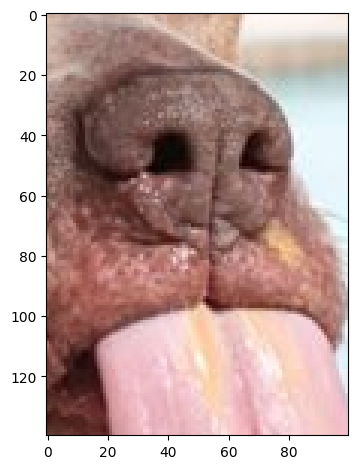

In [5]:
image_crop = image[250:390, 440:540, :]
io.imshow(image_crop)

Now convert the color image to a grayscale image and display it!

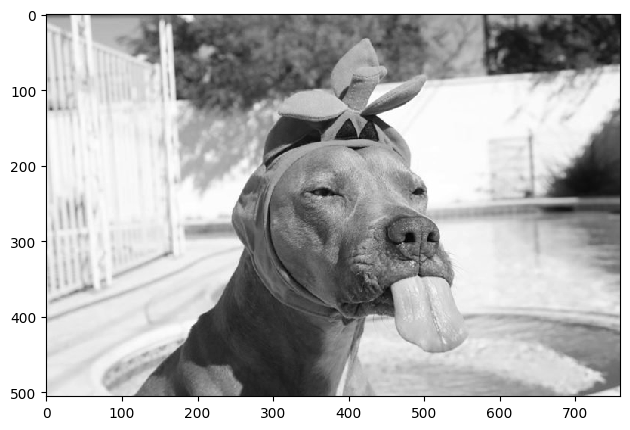

In [6]:
image_grey = color.rgb2gray(image)
io.imshow(image_grey)

There are other color spaces. For example, HSV will be used in the lecture. Convert your image to HSV and display the H-channel.

2
[[0.1875     0.1875     0.1875     ... 0.23809524 0.19230769 0.19047619]
 [0.27777778 0.23333333 0.23333333 ... 0.25       0.19230769 0.19047619]
 [0.59090909 0.57407407 0.57407407 ... 0.25       0.1969697  0.19230769]
 ...
 [0.02777778 0.02777778 0.02777778 ... 0.05882353 0.05882353 0.05882353]
 [0.02777778 0.02777778 0.02777778 ... 0.04444444 0.04444444 0.04444444]
 [0.02777778 0.02777778 0.02777778 ... 0.04444444 0.04444444 0.04444444]]


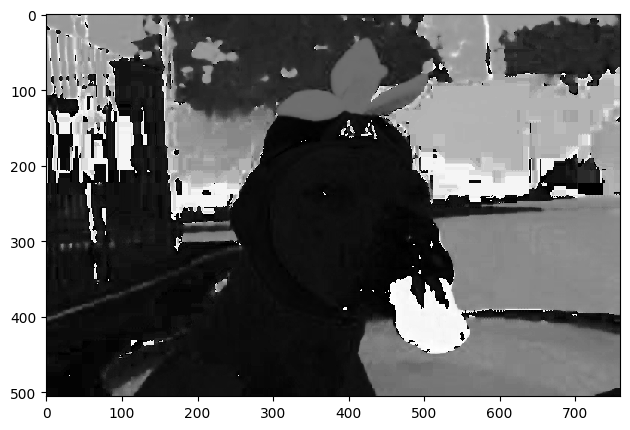

In [7]:
image_hsv = color.rgb2hsv(image)
image_hsv_hue = image_hsv[:,:,0]
# io.imshow(image_hsv)
io.imshow(image_hsv_hue)
print(image_hsv_hue.ndim)
print(image_hsv_hue)


Did you know that HSV now allows creating robust (i.e. lighting independent) color histograms? Create one with Matplotlib!

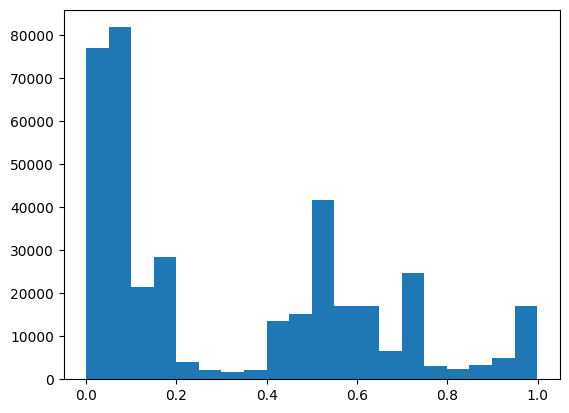

In [36]:
plt.hist(image_hsv_hue.ravel(), bins=20)
plt.show()

def show_histogram(image: np.ndarray) -> None:
    plt.hist(image.ravel(), bins=20)
    plt.show()

## Exercise 1 - Color Spaces, Morphological Operators

### Exercise 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put some example images in `/images` and provided you with one in the next cell.

Rough sketch:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)

(480, 854, 3)
uint8
bool
(480, 854, 3)
(480, 854)
bool
(480, 854)
bool


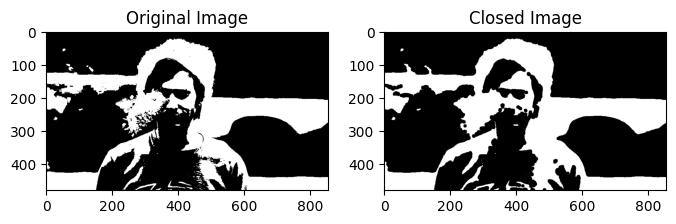

In [9]:
# Read an image (replace 'your_image_path' with the actual path to your image)
image = io.imread('images/taco/131.jpg')
print(image.shape)
print(image.dtype)

image_bin = np.zeros_like(image, dtype=bool)
print(image_bin.dtype)
print(image_bin.shape)

# If the image is not binary, convert it to binary
binary_image = color.rgb2gray(image) > 0.5  # You might need a different threshold
print(binary_image.shape)
print(binary_image.dtype)

# Define the structuring element (disk with radius 5 in this case)
selem = morphology.disk(5)

# Perform binary closing
closed_image = morphology.binary_closing(binary_image, selem)
print(closed_image.shape)
print(closed_image.dtype)

# Display the original and closed images (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Closed Image')
plt.imshow(closed_image, cmap='gray')

plt.show()

[(233, 255), (109, 153), (0, 27)]


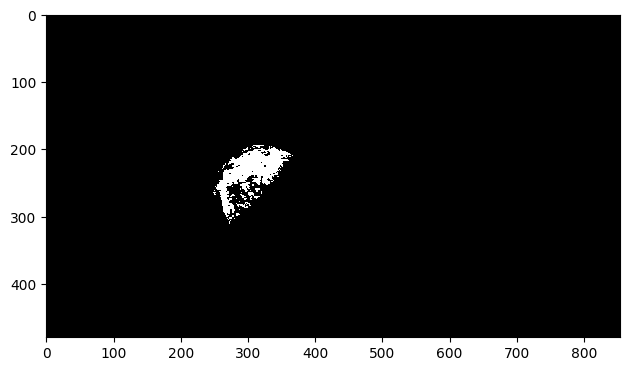

In [10]:
def binarize_image(original_image: np.ndarray, rgb: tuple[int, int, int]) -> np.ndarray:
    r_bound = (max(0,rgb[0]-22), min(255, rgb[0]+22))
    g_bound = (max(0,rgb[1]-22), min(255, rgb[1]+22))
    b_bound = (max(0,rgb[2]-22), min(255, rgb[2]+22))
    bounds = [r_bound, g_bound, b_bound]
    print(bounds)
    binarized_image = np.zeros((original_image.shape[0],original_image.shape[1]), dtype=bool)
    for row_idx, row in enumerate(image):
        for col_idx, col_item in enumerate(row):
            checks = [lower <= value <= upper for bound, value in zip(bounds, col_item) for lower, upper in [bound]]
            if all(checks):
                binarized_image[row_idx][col_idx] = True
    return binarized_image

image = io.imread('images/taco/131.jpg')
binarized_image = binarize_image(image, rgb=(255, 131, 5))
io.imshow(binarized_image)

In [11]:
# def binarize_image(
#         original_image: np.ndarray, rgb: tuple[int, int, int]) -> np.ndarray:
#     r_bound = (max(0,rgb[0]-22), min(255, rgb[0]+22))
#     g_bound = (max(0,rgb[1]-22), min(255, rgb[1]+22))
#     b_bound = (max(0,rgb[2]-22), min(255, rgb[2]+22))
#     bounds = [r_bound, g_bound, b_bound]
#     print(bounds)
#     binarized_image = np.zeros_like(original_image)
#     for row_idx, row in enumerate(image):
#         for col_idx, col_item in enumerate(row):
#             checks = [lower <= value <= upper for bound, value in zip(bounds, col_item) for lower, upper in [bound]]
#             if all(checks):
#                 binarized_image[row_idx][col_idx] = [255,255,255]
#     return binarized_image

# image = io.imread('images/taco/131.jpg')
# binarized_image = binarize_image(image, rgb=(255, 131, 5))
# io.imshow(binarized_image)

In [12]:
# bottle_1 = (0, 176, 216)
# bottle_2 = (236, 52, 148)
# bottle_3 = (194, 216, 44)
# r_bound = (max(0, min(bottle_1[0], bottle_2[0],bottle_3[0])-20),min(max(bottle_1[0], bottle_2[0],bottle_3[0])+35, 255))
# g_bound = (max(0, min(bottle_1[1], bottle_2[1],bottle_3[1])-20),min(max(bottle_1[1], bottle_2[1],bottle_3[1])+35, 255))
# b_bound = (max(0, min(bottle_1[2], bottle_2[2],bottle_3[2])-20),min(max(bottle_1[2], bottle_2[2],bottle_3[2])+35, 255))
# bounds = [r_bound, g_bound, b_bound]
# print(bounds)
# image = io.imread('images/bottles.png')
# binarized_image = np.zeros_like(image)
# for row_idx, row in enumerate(image):
#     for col_idx, col_item in enumerate(row):
#         checks = [lower <= value <= upper for bound, value in zip(bounds, col_item) for lower, upper in [bound]]
#         if all(checks):
#             binarized_image[row_idx][col_idx] = [255,255,255]
# io.imshow(binarized_image)

### Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with the two-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

In [13]:
# def apply_erosion(prev, curr, next, index) -> bool:
#     struct_elem_px = [
#         curr[index - 1],
#         curr[index + 1],
#         prev[index],
#         next[index],
#     ]
#     target = np.array([255, 255, 255])
#     return all(np.array_equal(elem, target) for elem in struct_elem_px)

In [14]:
# erosion_image = np.zeros_like(binarized_image)
# for row_idx, row in enumerate(binarized_image[1:-1], start=1):
#     for col_idx, col_item in enumerate(row[1:-1], start=1):
#         if apply_erosion(binarized_image[row_idx-1],binarized_image[row_idx],binarized_image[row_idx+1], col_idx):
#             erosion_image[row_idx][col_idx] = [255,255,255]
#         # else:
#         #     erosion_image[row_idx][col_idx] = [0,0,0]
# io.imshow(erosion_image)

In [15]:
# def erode_image(bin_image: np.ndarray) -> np.ndarray:
#     erosion_image = np.zeros_like(bin_image)
#     for row_idx, row in enumerate(bin_image[1:-1], start=1):
#         for col_idx, col_item in enumerate(row[1:-1], start=1):
#             if apply_erosion(bin_image[row_idx-1],bin_image[row_idx],bin_image[row_idx+1], col_idx):
#                 erosion_image[row_idx][col_idx] = [255,255,255]
#     return erosion_image

In [16]:
def apply_erosion(prev, curr, next, index) -> bool:
    struct_elem_px = [
        curr[index - 1],
        curr[index + 1],
        prev[index],
        next[index],
    ]
    # target = np.array([255, 255, 255])
    return all(struct_elem_px)

In [17]:
def erode_image(bin_image: np.ndarray) -> np.ndarray:
    erosion_image = np.zeros_like(bin_image, dtype=bool)
    for row_idx, row in enumerate(bin_image[1:-1], start=1):
        for col_idx, col_item in enumerate(row[1:-1], start=1):
            if apply_erosion(bin_image[row_idx-1],bin_image[row_idx],bin_image[row_idx+1], col_idx):
                erosion_image[row_idx][col_idx] = True
    return erosion_image

In [18]:
# def apply_dilation(prev, curr, next, index) -> bool:
#     struct_elem_px = [
#         curr[index - 1],
#         curr[index + 1],
#         prev[index],
#         next[index],
#     ]
#     target = np.array([255, 255, 255])
#     return any(np.array_equal(elem, target) for elem in struct_elem_px)

In [19]:
# dilation_image = np.zeros_like(binarized_image)
# for row_idx, row in enumerate(erosion_image[1:-1], start=1):
#     for col_idx, col_item in enumerate(row[1:-1], start=1):
#         if apply_dilation(erosion_image[row_idx-1],erosion_image[row_idx],erosion_image[row_idx+1], col_idx):
#             dilation_image[row_idx][col_idx] = [255,255,255]
#         # else:
#         #     erosion_image[row_idx][col_idx] = [0,0,0]
# io.imshow(dilation_image)

In [20]:
# def dilate_image(bin_image: np.ndarray) -> np.ndarray:
#     dilation_image = np.zeros_like(bin_image)
#     for row_idx, row in enumerate(bin_image[1:-1], start=1):
#         for col_idx, col_item in enumerate(row[1:-1], start=1):
#             if apply_dilation(bin_image[row_idx-1],bin_image[row_idx],bin_image[row_idx+1], col_idx):
#                 dilation_image[row_idx][col_idx] = [255,255,255]
#     return dilation_image

In [21]:
def apply_dilation(prev, curr, next, index) -> bool:
    struct_elem_px = [
        curr[index - 1],
        curr[index + 1],
        prev[index],
        next[index],
    ]
    return any(struct_elem_px)

In [22]:
def dilate_image(bin_image: np.ndarray) -> np.ndarray:
    dilation_image = np.zeros_like(bin_image, dtype=bool)
    for row_idx, row in enumerate(bin_image[1:-1], start=1):
        for col_idx, col_item in enumerate(row[1:-1], start=1):
            if apply_dilation(bin_image[row_idx-1],bin_image[row_idx],bin_image[row_idx+1], col_idx):
                dilation_image[row_idx][col_idx] = True
    return dilation_image

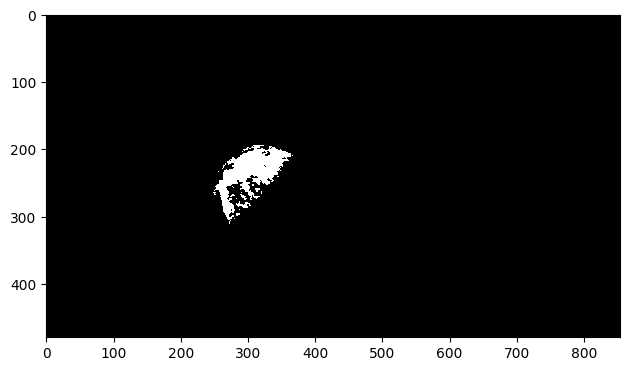

In [23]:
closed_image = erode_image(dilate_image(binarized_image))
io.imshow(closed_image)

bool


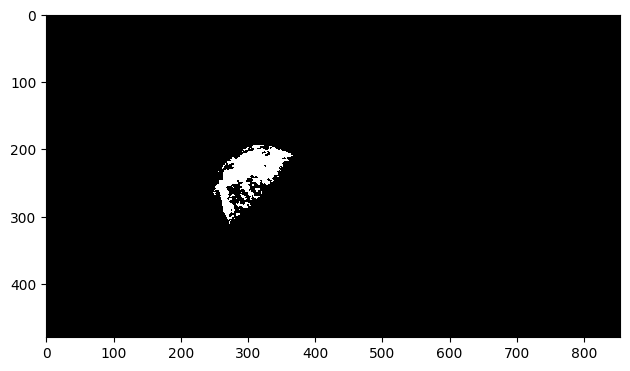

In [24]:
# two_dim_image = np.all(binarized_image, axis=2)
# print(two_dim_image.shape)
skimage_closed_image = morphology.binary_closing(binarized_image)
print(skimage_closed_image.dtype)
io.imshow(skimage_closed_image)

In [25]:
# helpers
def minNonZero(int1, int2, conflict_table: List) -> int:
    if int1 == 0:
        return int2
    elif int2 == 0:
        return int1
    elif int1 == int2:
        return int1
    else:
        minimum = min(int1, int2)
        conflict_table.append((minimum, max(int1,int2)))
        return min(int1, int2)

import random

def perform_transitivity(minor: int, major: int, conflict_table: np.ndarray) -> None:
    for elem in conflict_table:
        if elem[0] == minor:
            elem[0] = major

def check_equivalency(label: int, conflict_table: np.ndarray) -> int:
    for elem in conflict_table:
        if elem[1] == label:
            return elem[0]
    return label

def color_generator(label: int, color_table: dict[int,List[int]]) -> List[int]:
    new_color = [random.randint(0, 255) for _ in range(3)]
    color_table[label] = new_color
    return new_color

def check_bounding_box(y_val: int, x_val: int, bounding_box_coords: dict[str,float]) -> None:
    if y_val < bounding_box_coords['ymin']:
        bounding_box_coords['ymin'] = y_val
    if y_val > bounding_box_coords['ymax']:
        bounding_box_coords['ymax'] = y_val
    if x_val < bounding_box_coords['xmin']:
        bounding_box_coords['xmin'] = x_val
    if x_val > bounding_box_coords['xmax']:
        bounding_box_coords['xmax'] = x_val

(480, 854)
{'xmin': 856, 'xmax': 0, 'ymin': 482, 'ymax': 0}


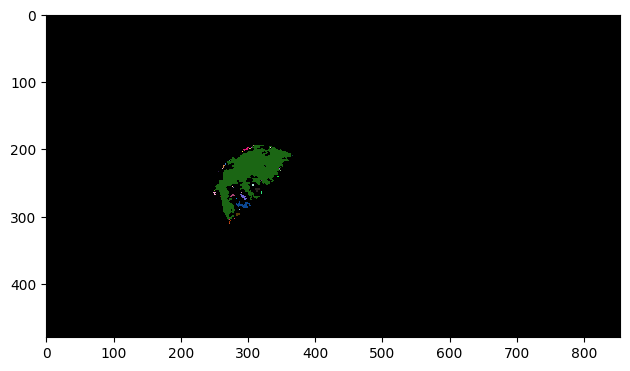

In [26]:
# connected components algorithm
def connected_components(original_image: np.ndarray) -> (np.ndarray, dict[str,int]):
    image_shape = original_image.shape
    print(image_shape)
    image_shape = (image_shape[0]+2,image_shape[1]+2)
    cc_table = np.zeros(image_shape, dtype=int)
    cc_counter = 1
    conflict_table = []
    for row_idx, row in enumerate(original_image):
        for col_idx, col_item in enumerate(row):
            if original_image[row_idx][col_idx] == True:
                behind = cc_table[row_idx+1][col_idx]
                above = cc_table[row_idx][col_idx+1]
                neighbour_label = minNonZero(behind, above, conflict_table)
                if neighbour_label != 0:
                    cc_table[row_idx+1][col_idx+1] = neighbour_label
                else:
                    cc_table[row_idx+1][col_idx+1] = cc_counter
                    cc_counter += 1
    unique_ct = np.unique(conflict_table, axis=0)
    cc_image = np.zeros((original_image.shape[0],original_image.shape[1],3), dtype=np.uint8)
    cc_table_cut = cc_table[1:-1,1:-1]
    color_table = {}
    bounding_box_coords = {'xmin':image_shape[1], 'xmax':0, 'ymin':image_shape[0], 'ymax':0}
    print(bounding_box_coords)
    for row_idx, row in enumerate(cc_table_cut):
        for col_idx, col_item in enumerate(row):
            if col_item != 0:
                real_label = check_equivalency(col_item, unique_ct)
                perform_transitivity(col_item, real_label, unique_ct)
                if real_label in color_table:
                    cc_image[row_idx][col_idx] = color_table[real_label]
                else:
                    cc_image[row_idx][col_idx] = color_generator(real_label, color_table)
                check_bounding_box(row_idx,col_idx,bounding_box_coords)
    return (cc_image, bounding_box_coords)

new_image = connected_components(closed_image)
io.imshow(new_image[0])

{'xmin': 176, 'xmax': 366, 'ymin': 166, 'ymax': 311}


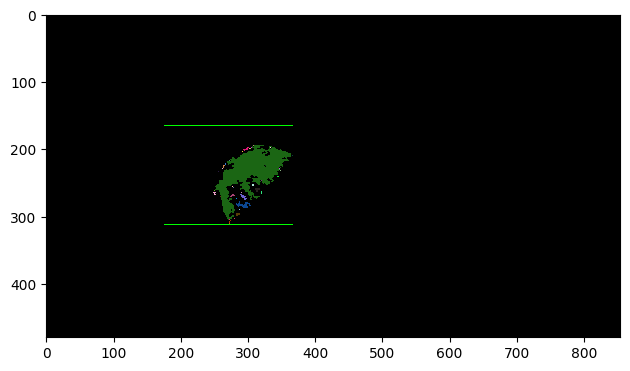

In [27]:
# bounding box
def draw_bounding_box(image: np.ndarray, bounding_coords: dict[str,int]) -> np.ndarray:
    row, col = draw.rectangle_perimeter(start=(bounding_coords['ymin'],bounding_coords['xmin']), end=(bounding_coords['ymax'],bounding_coords['xmax']))
    image[row, col] = [0,255,0]
    return image
print(new_image[1])
bound_image = draw_bounding_box(new_image[0], new_image[1])
io.imshow(bound_image)

### Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

### Exercise 1.4 (BONUS)

* find connected components using a one-pass algorithm
* plot the resulting image and compare it to the result of your two-pass implementation (**RESULT**)

## Exercise 2: Convolution and Canny edge detection

### Exercise 2.1: Convolution
Implement the convolution operation for 2-D images (i.e. no colors here, sorry).

In [28]:
def show_original_and_convolved_image(orig_image: np.ndarray, conv_image: np.ndarray) -> None:
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(orig_image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('blurred image')
    plt.imshow(conv_image, cmap='gray')

    plt.show()

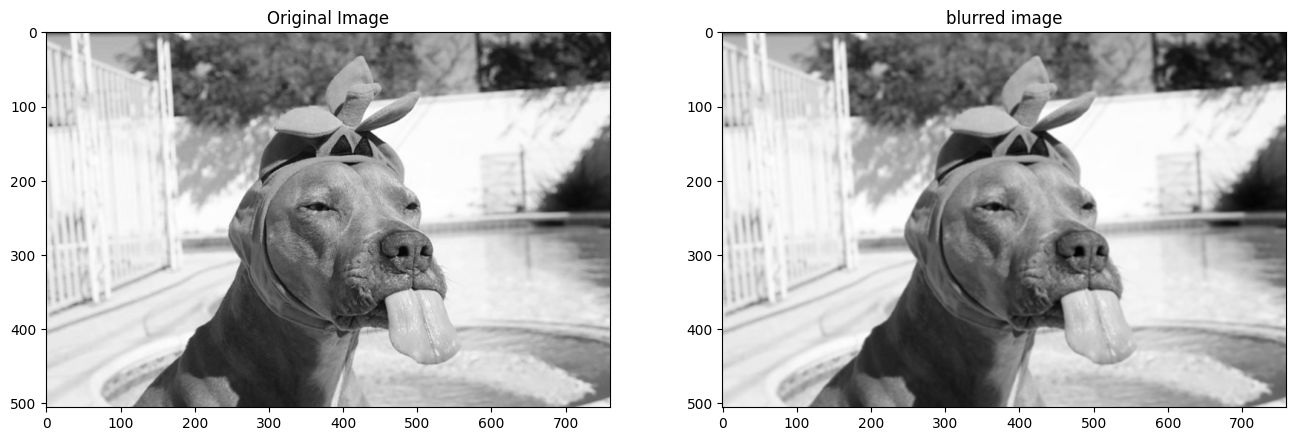

In [29]:
def conv2d(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image: np.ndarray = np.pad(array=image, pad_width=((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    result: np.ndarray = np.zeros_like(image, dtype=float)
    for row_idx, row in enumerate(padded_image[pad_height:-pad_height], start=pad_height):
        for col_idx, col_item in enumerate(row[pad_width:-pad_width], start=pad_width):
            neighbourhood = padded_image[row_idx-pad_height:row_idx+pad_height+1,col_idx-pad_width:col_idx+pad_width+1]
            convolved_pixel = np.dot(kernel.flatten(), neighbourhood.flatten())
            result[row_idx-pad_height][col_idx-pad_width] = convolved_pixel
    return result

one_kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]])
image = color.rgb2gray(io.imread('images/dog.jpg'))
blurred_image = conv2d(image, one_kernel)
# image2 = np.ones_like(image)
# plt.imshow(image2, cmap="gray", vmin=0, vmax=1)

show_original_and_convolved_image(orig_image=image, conv_image=blurred_image)

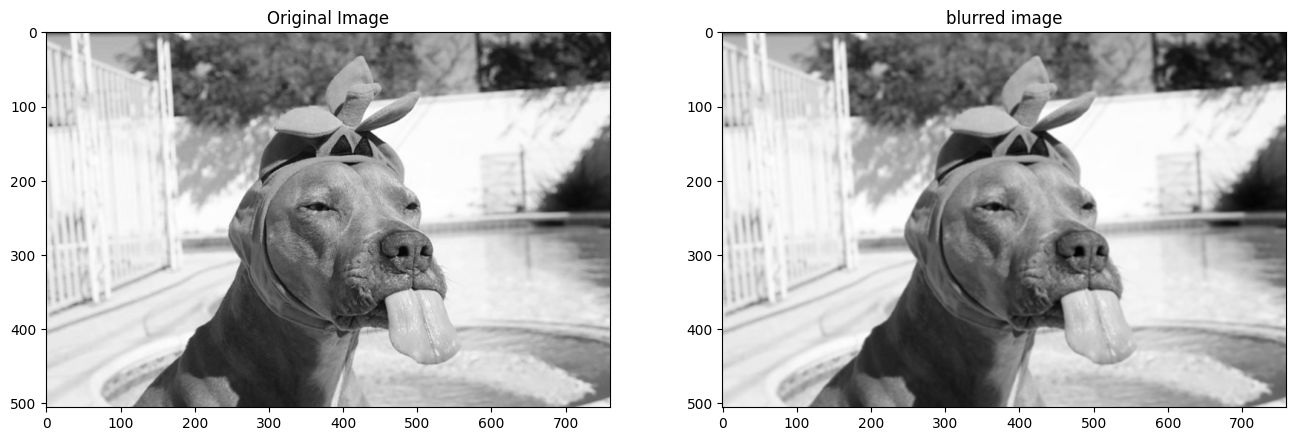

In [30]:
from scipy import ndimage
scipy_convolve = ndimage.convolve(image, one_kernel)
show_original_and_convolved_image(orig_image=image, conv_image=scipy_convolve)

Convolve an image of your choice with a Gaussian kernel. Play around with the size of the kernel and the standard deviation of the Gaussian. Show your results (***RESULT***).

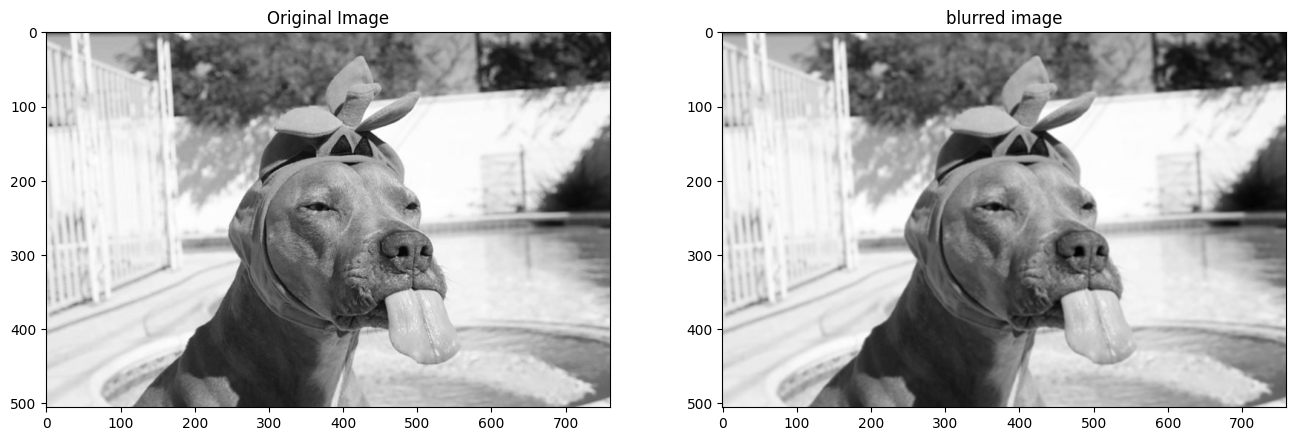

In [31]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

five_kernel = gaussian_kernel(3, 3)
blurred_with_gaussian = conv2d(image=image, kernel=five_kernel)
show_original_and_convolved_image(orig_image=image, conv_image=blurred_with_gaussian)

<span style="color:green">Es sieht so aus, als müssten die Größe des Gauss-Kernels und Sigmal ungefähr die gleiche Größe haben, damit die Veränderungen im Bild sichtbar werden. Wenn die Size konstant ist und Sigma wächst, hat es keinen Effekt auf das Bild. Woran liegt das? </span>

Now, implement a simple edge detector by first filtering with a Sobel operator and then thresholding the ***RESULT***. How does smoothing the input change the ***RESULT***?

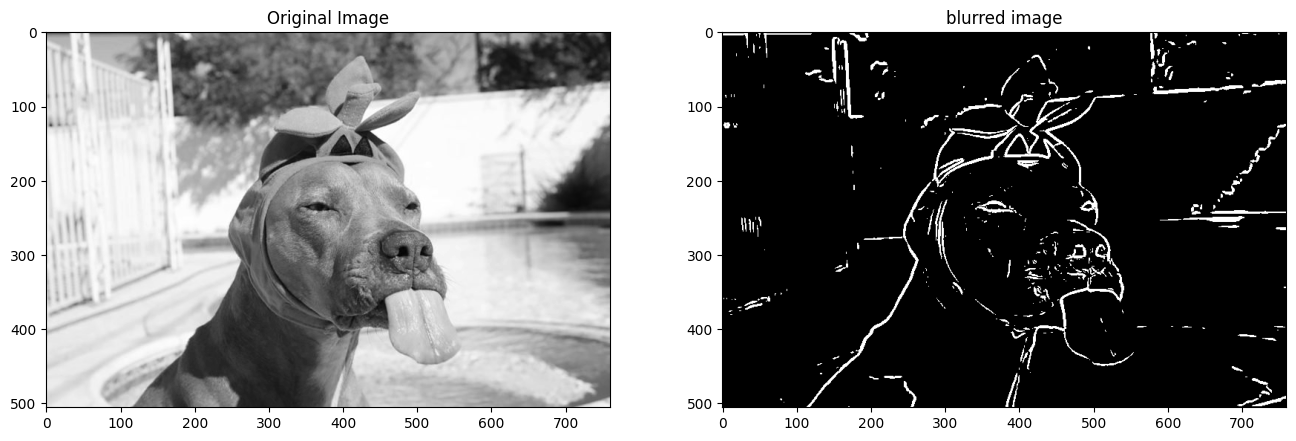

In [32]:
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

threshold: float = 0.06
edge_image: np.ndarray = np.zeros_like(image, dtype=float)
sobel_x_image = conv2d(blurred_with_gaussian, sobel_x)
sobel_y_image = conv2d(blurred_with_gaussian, sobel_y)
# sobel_x_image = np.where(np.logical_or(sobel_x_image < -0.08, sobel_x_image > 0.08), 1, 0)
edge_image[np.logical_or(sobel_x_image < -threshold, sobel_x_image > threshold)] = 1
edge_image[np.logical_or(sobel_y_image < -threshold, sobel_y_image > threshold)] = 1
show_original_and_convolved_image(image, edge_image)

### Exercise 2.2: Canny Edge Detection

#### Preprocessing
If you haven't yet: smooth the image with a Gaussian of your choice. Then use the Sobel operator to create the gradient magnitude and direction matrices (see slides page 23). Round the gradient directions to the 8-neighbor's directions. Display all  intermediate ***RESULT***s!

In [33]:
def gaussian_kernel_generator(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [78]:
image = color.rgb2gray(io.imread('images/dog.jpg'))
gaussian_kernel = gaussian_kernel_generator(3, 3)
smoothed_image = conv2d(image, gaussian_kernel)

x_edges = conv2d(smoothed_image, sobel_x)
y_edges = conv2d(smoothed_image, sobel_y)
image_gradient = np.sqrt(np.square(x_edges)+np.square(y_edges))
theta = np.arctan2(y_edges, x_edges)
# image_gradient = np.hypot(x_edges,y_edges)

# threshold = 0.06
# result = np.where(image_gradient > threshold, 1, 0)
# show_original_and_convolved_image(image, result)

In [79]:
directions_list = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4])
directions_list = np.round(directions_list, 3)
print(directions_list)

def get_absolut_direction(direction: float) -> float:
    diff = np.abs(np.array(directions_list) - direction)
    index = np.argmin(diff)
    nearest_number = directions_list[index]
    return nearest_number

def round_directions(image: np.ndarray) -> np.ndarray:
    result: np.ndarray = np.zeros_like(image)
    apply_rounding = np.vectorize(get_absolut_direction)
    result = apply_rounding(image)
    return result

rounded_theta = round_directions(theta)

[ 0.     0.785  1.571  2.356  3.142 -2.356 -1.571 -0.785]


#### Non-Maximum Suppression
Implement the Non-Maximum Suppression step as described in the lecture. Subtract the result from the gradient magnitude image and show the ***RESULT***!

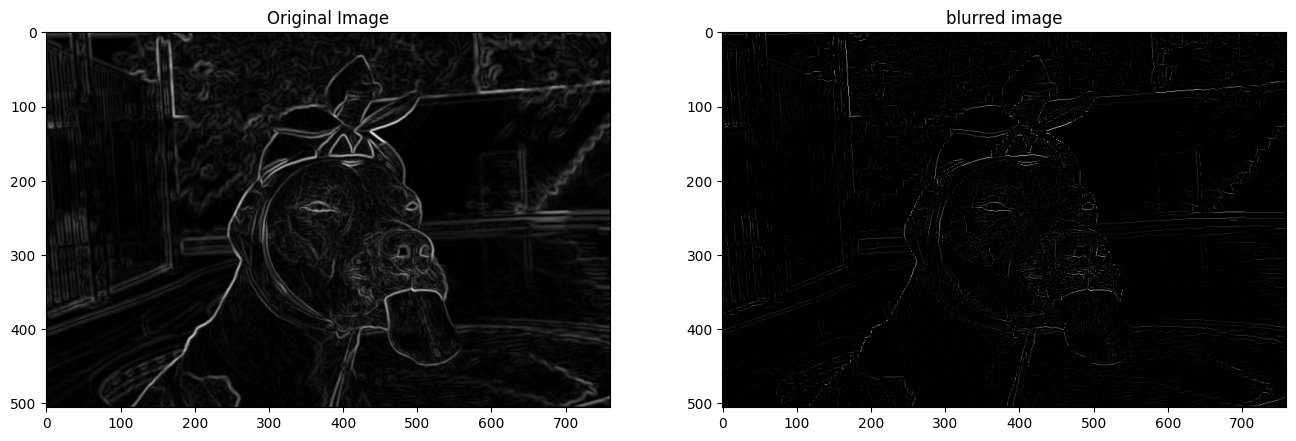

In [80]:
def max_suppression(gradient_mag: np.ndarray, gradient_direction: np.ndarray) -> np.ndarray:
    assert(gradient_mag.shape==gradient_direction.shape)
    result: np.ndarray = np.zeros_like(gradient_mag)
    for row_idx, row in enumerate(gradient_direction[1:-1], start=1):
        for col_idx, col_item in enumerate(row[1:-1], start=1):
            q = 1.0
            r = 1.0
            curr_direction = gradient_direction[row_idx][col_idx]
            if curr_direction == 0.00 or curr_direction == 3.14:
                q = gradient_mag[row_idx][col_idx-1]
                r = gradient_mag[row_idx][col_idx+1]
            if curr_direction == 0.785 or curr_direction == -2.356:
                q = gradient_mag[row_idx+1][col_idx-1]
                r = gradient_mag[row_idx-1][col_idx+1]
            if curr_direction == 1.571 or curr_direction == -1.571:
                q = gradient_mag[row_idx+1][col_idx]
                r = gradient_mag[row_idx-1][col_idx]
            if curr_direction == 2.356 or curr_direction == -0.785:
                q = gradient_mag[row_idx-1][col_idx-1]
                r = gradient_mag[row_idx+1][col_idx+1]
            if gradient_mag[row_idx][col_idx] > q and gradient_mag[row_idx][col_idx] > r:
               result[row_idx][col_idx] = gradient_mag[row_idx][col_idx]
    return result

max_sup_image = max_suppression(image_gradient, rounded_theta)
show_original_and_convolved_image(image_gradient, max_sup_image)

#### Thresholding and Edge Tracing
Implement the edge tracing as described in the lecture and show the final result for three different threshold pairs: two low thresholds (e.g. 20 and 50), high thresholds (e.g. 80 and 120) and thresholds with large spacing (e.g. 40 and 140). (***RESULT***)

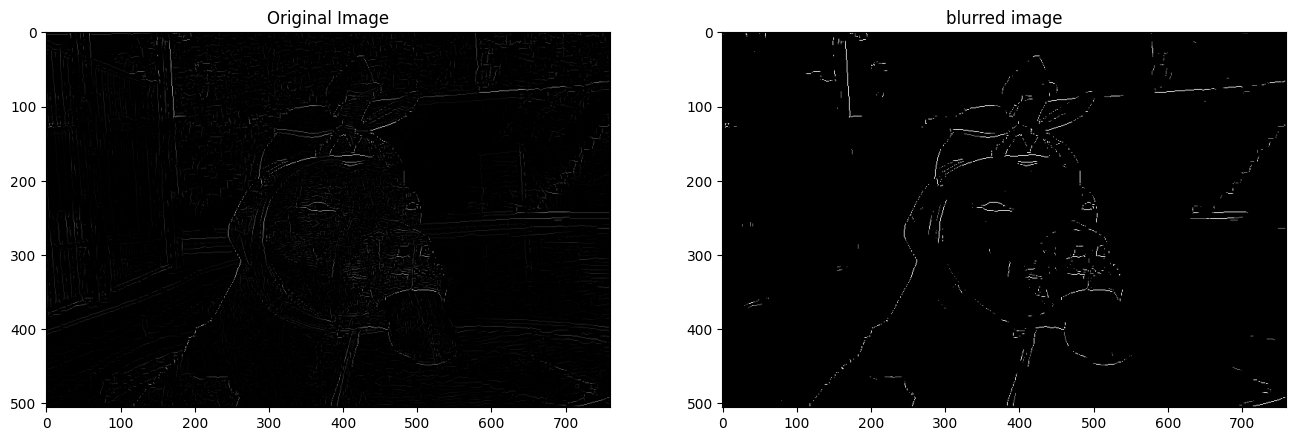

In [99]:
def two_thresholds(image: np.ndarray, lowThresholdRatio: float=0.8, highThresholdRatio: float=0.3) -> np.ndarray:
    highThreshold = np.max(image) * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    weak = np.float64(0.5)
    strong = np.float64(1.0)
    result: np.ndarray = np.zeros_like(image)

    strong_i, strong_j = np.where(image >= highThreshold)
    weak_i, weak_j = np.where((image <= highThreshold) & (image >= lowThreshold))

    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return result

two_thresh_image = two_thresholds(max_sup_image)
show_original_and_convolved_image(max_sup_image, two_thresh_image)

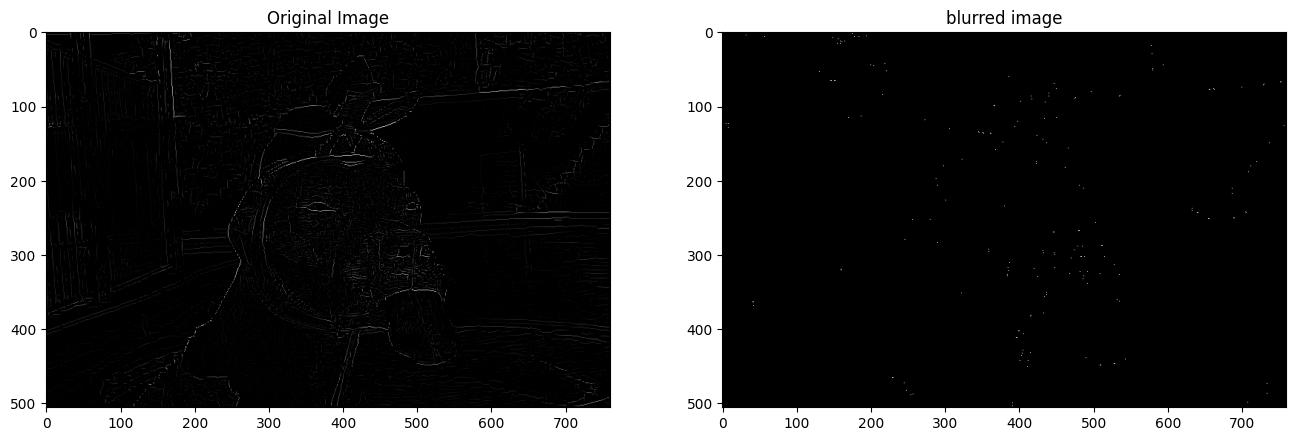

In [100]:
footprint: np.ndarray = np.array([[1,1,1],
                                  [1,0,1],
                                  [1,1,1]])

def check_and_change_values(values):
    weak = np.float64(0.5)
    strong = np.float64(1.0)
    if values[4] == weak and strong in values:
        return strong
    else:
        return 0.0

def hysteresis(image: np.ndarray) -> np.ndarray:
    results = ndimage.generic_filter(image, check_and_change_values, footprint=footprint)
    return results

final = hysteresis(two_thresh_image)
show_original_and_convolved_image(max_sup_image, final)

In [ ]:
def hysteresis(image: np.ndarray) -> np.ndarray:
    weak = np.float64(0.5)
    strong = np.float64(1.0)
    results = np.zeros_like(image)
    for row_idx, row in enumerate(image[1:-1], start=1):
        for col_idx, col_item in enumerate(row[1:-1], start=1):
            if image[row_idx][col_idx] == weak:
                if ((image[row_idx+1, col_idx-1] == strong) or (image[row_idx+1, col_idx] == strong) or (image[row_idx+1, col_idx+1] == strong)
                    or (image[row_idx, col_idx-1] == strong) or (image[row_idx, col_idx+1] == strong)
                     or (image[row_idx-1, col_idx-1] == strong) or (image[row_idx-1, col_idx] == strong) or (image[row_idx-1, col_idx+1] == strong)):
                    image[row_idx, col_idx] = strong
                else:
                    image[row_idx, col_idx] = 0
    return results

### Congratz, you made it! You can now try to solve this optional exercise.

This exercise is not graded, but might be a good preparation for the exam.

Please go to the following link: https://forms.gle/wMNmbTu1sAAWQz8d8.

In the form, you will find the optional task (and the corresponding consent form in case you agree with us processing your data). The task is formulated in German, and we would prefer German as the language for your answer. However, if you don’t feel comfortable with that, please feel free to solve it in English.


